# Aufgabe 1 (2P)
Laden Sie den Datensatz „rawdata_luftqualitaet.csv“ in einen DataFrame. Skalieren Sie die Daten mit dem StandardScaler. Trennen Sie die
Daten in einen Lern- und Testdatensatz zur Classification des Labels "state_air_quality" mit den 3 Klassen 0, 1 und 2. Nutzen Sie alle 5
Merkmale 'humidity_inside','temperature_inside','co2_inside','temperature_heater‘ und 'temperature_wall_inside‘ im Training.

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('rawdata_luftqualitaet.csv')

X = df[df.columns[:-1]].values
y = df['state_air_quality']

# Validation data to calculate the loss and accuracy in every epoch
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=12)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## a)
Erstellen Sie ein sequenzielles Modell in Keras mit 2 Dense Layers mit jeweils 60 Neuronen. (1P)

<img src="images/1a.png" width="600">

In [71]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Multiple classification
model = Sequential()
model.add(Dense(units=60, input_shape=(5,), activation='relu', name='dense_9'))
model.add(Dense(units=60, activation='relu', name='dense_10'))
model.add(Dense(units=3, activation='softmax', name='dense_11_output'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

C:\Users\Muhammed Korkmaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 60)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11_output (Dense)         │ (None, 3)              │           183 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,203 (16.42 KB)

 Trainable params: 4,203 (16.42 KB)

 Non-trainable params: 0 (0.00 B)

## b)
Trainieren Sie das Modell mit mind. 200 Epochen und visualisieren Sie den Anlernprozess mit „Overfitting“ ähnlich wie unten in der
Abbildung (1P)

<img src="images/1b.png" width="600">

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6448 - loss: 0.8447 - val_accuracy: 0.8533 - val_loss: 0.5831
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8607 - loss: 0.4833 - val_accuracy: 0.9022 - val_loss: 0.4009
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8907 - loss: 0.3540 - val_accuracy: 0.9185 - val_loss: 0.3063
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9085 - loss: 0.2752 - val_accuracy: 0.9185 - val_loss: 0.2427
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9221 - loss: 0.2215 - val_accuracy: 0.9293 - val_loss: 0.2015
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9344 - loss: 0.1853 - val_accuracy: 0.9511 - val_loss: 0.1731
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9481 - loss: 0.1595 - val_accuracy: 0.9620 - val_loss: 0.1535
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9604 - loss: 0.1409 - val_accuracy: 0.9620 - v

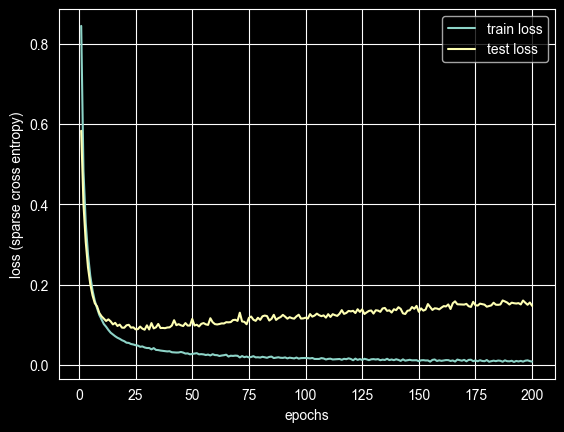

In [72]:
epochs = 200

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), verbose=1)

accuracy_train = history.history['accuracy']
loss_train = history.history['loss']
loss_test = history.history['val_loss']

epochs_axis = range(1, len(accuracy_train)+1)

plt.plot(epochs_axis, loss_train, label='train loss')
plt.plot(epochs_axis, loss_test, label='test loss')
plt.xlabel('epochs')
plt.ylabel('loss (sparse cross entropy)')
plt.legend()
plt.show()

---
# Aufgabe 2 (2P)
Nutzen Sie den gleichen Lern- und Testdatensatz wie in Aufgabe 1.

## a)
Erstellen Sie ein sequenzielles Modell in Keras mit 2 Dense Layers mit jeweils 60 Neuronen wie in Aufgabe 1a. Fügen Sie dieses Mal
Callbacks für ein EarlyStopping ein. (1P)

In [73]:
from tensorflow.keras.callbacks import (EarlyStopping, ModelCheckpoint)

stopping = EarlyStopping(monitor='val_loss', patience=5)
checkpoint = ModelCheckpoint(filepath='keras_test_model.h5', monitor='val_loss',save_best_only=True)

# Multiple classification
model = Sequential()
model.add(Dense(units=60, input_shape=(5,), activation='relu', name='dense_9'))
model.add(Dense(units=60, activation='relu', name='dense_10'))
model.add(Dense(units=3, activation='softmax', name='dense_11_output'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

C:\Users\Muhammed Korkmaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 60)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11_output (Dense)         │ (None, 3)              │           183 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,203 (16.42 KB)

 Trainable params: 4,203 (16.42 KB)

 Non-trainable params: 0 (0.00 B)

## b)
Trainieren Sie das Modell mit mind. 200 Epochen sowie den definierten Callbacks und visualisieren Sie den Anlernprozess erneut,
ähnlich wie unten, je nach nachdem wie bei Ihnen der Prozess verlaufen ist, bemühen Sie sich darum, das Overfitting durch die
callbacks zu vermeiden. (1P)

<img src="images/2b.png" width="600">

Epoch 1/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 12s 560ms/step - accuracy: 0.4062 - loss: 1.1607

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7828 - loss: 0.7120 - val_accuracy: 0.8315 - val_loss: 0.4739
Epoch 2/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7188 - loss: 0.6052

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8634 - loss: 0.4192 - val_accuracy: 0.9022 - val_loss: 0.3577
Epoch 3/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9062 - loss: 0.2927

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8975 - loss: 0.3270 - val_accuracy: 0.9076 - val_loss: 0.2956
Epoch 4/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9688 - loss: 0.1707

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9085 - loss: 0.2729 - val_accuracy: 0.9130 - val_loss: 0.2546
Epoch 5/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9688 - loss: 0.1378

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9085 - loss: 0.2333 - val_accuracy: 0.9185 - val_loss: 0.2206
Epoch 6/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8438 - loss: 0.2584

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9221 - loss: 0.1962 - val_accuracy: 0.9185 - val_loss: 0.1947
Epoch 7/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8750 - loss: 0.1946

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9208 - loss: 0.1718 - val_accuracy: 0.9348 - val_loss: 0.1699
Epoch 8/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9062 - loss: 0.1715

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9385 - loss: 0.1527 - val_accuracy: 0.9511 - val_loss: 0.1550
Epoch 9/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9375 - loss: 0.1170

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9563 - loss: 0.1333 - val_accuracy: 0.9565 - val_loss: 0.1422
Epoch 10/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9062 - loss: 0.1600

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9604 - loss: 0.1219 - val_accuracy: 0.9511 - val_loss: 0.1359
Epoch 11/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9375 - loss: 0.1211

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9645 - loss: 0.1122 - val_accuracy: 0.9620 - val_loss: 0.1244
Epoch 12/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9617 - loss: 0.1016 - val_accuracy: 0.9402 - val_loss: 0.1307
Epoch 13/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.1019

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9727 - loss: 0.0968 - val_accuracy: 0.9402 - val_loss: 0.1192
Epoch 14/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9688 - loss: 0.0900

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9672 - loss: 0.0898 - val_accuracy: 0.9565 - val_loss: 0.1125
Epoch 15/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9688 - loss: 0.0874

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9713 - loss: 0.0847 - val_accuracy: 0.9620 - val_loss: 0.1095
Epoch 16/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0559

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9754 - loss: 0.0799 - val_accuracy: 0.9620 - val_loss: 0.1044
Epoch 17/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9768 - loss: 0.0743 - val_accuracy: 0.9565 - val_loss: 0.1048
Epoch 18/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9781 - loss: 0.0715 - val_accuracy: 0.9565 - val_loss: 0.1087
Epoch 19/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9822 - loss: 0.0674 - val_accuracy: 0.9239 - val_loss: 0.1157
Epoch 20/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0631 - val_accuracy: 0.9565 - val_loss: 0.1062
Epoch 21/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0448

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9822 - loss: 0.0620 - val_accuracy: 0.9565 - val_loss: 0.0993
Epoch 22/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9795 - loss: 0.0616 - val_accuracy: 0.9620 - val_loss: 0.1007
Epoch 23/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0419

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9822 - loss: 0.0599 - val_accuracy: 0.9620 - val_loss: 0.0974
Epoch 24/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0423

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9863 - loss: 0.0554 - val_accuracy: 0.9674 - val_loss: 0.0973
Epoch 25/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9836 - loss: 0.0541 - val_accuracy: 0.9511 - val_loss: 0.0982
Epoch 26/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9795 - loss: 0.0522 - val_accuracy: 0.9565 - val_loss: 0.1017
Epoch 27/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0522

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9863 - loss: 0.0520 - val_accuracy: 0.9511 - val_loss: 0.0956
Epoch 28/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9850 - loss: 0.0475 - val_accuracy: 0.9620 - val_loss: 0.0970
Epoch 29/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9877 - loss: 0.0467 - val_accuracy: 0.9620 - val_loss: 0.1020
Epoch 30/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9877 - loss: 0.0458 - val_accuracy: 0.9565 - val_loss: 0.0985
Epoch 31/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9850 - loss: 0.0454 - val_accuracy: 0.9565 - val_loss: 0.1034
Epoch 32/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9850 - loss: 0.0450 - val_accuracy: 0.9565 - val_loss: 0.0958


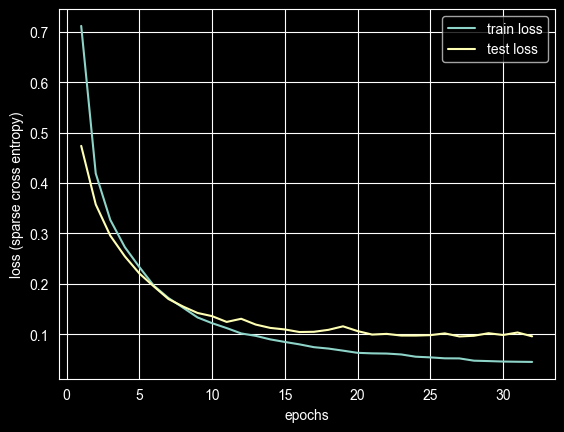

In [74]:
epochs = 200

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), callbacks=[stopping, checkpoint],verbose=1)

accuracy_train = history.history['accuracy']
loss_train = history.history['loss']
loss_test = history.history['val_loss']

epochs_axis = range(1, len(accuracy_train)+1)

plt.plot(epochs_axis, loss_train, label='train loss')
plt.plot(epochs_axis, loss_test, label='test loss')
plt.xlabel('epochs')
plt.ylabel('loss (sparse cross entropy)')
plt.legend()
plt.show()

---
# Aufgabe 3 (2P)
Nutzen Sie den gleichen Lern- und Testdatensatz wie in Aufgabe 1 und 2.

## a)
Erstellen Sie ein sequenzielles Modell in Keras mit 2 Dense Layers mit jeweils 60 Neuronen wie in Aufgabe 1a. Nutzen Sie dieses Mal
die Methode der L2-Regularisierung ohne Callbacks, um eine Überanpassung zu vermeiden. (1P)

In [83]:
from tensorflow.keras.regularizers import l2

reg = l2(l2=.3)

model_reg = Sequential()
# diese Schicht regularisieren kernel_regularizer = reg
model_reg.add(Dense(units=60, input_shape=(5,),activation='relu',kernel_regularizer=reg))
model_reg.add(Dense(units=60, activation='relu',kernel_regularizer=reg))
# diese Schicht Neuronen auch
model_reg.add(Dense(units=3, activation='softmax',
kernel_regularizer=reg))
model_reg.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_reg.summary()

C:\Users\Muhammed Korkmaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 60)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 3)              │           183 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,203 (16.42 KB)

 Trainable params: 4,203 (16.42 KB)

 Non-trainable params: 0 (0.00 B)

## b)
Trainieren Sie das Modell mit mind. 200 Epochen und visualisieren Sie den Anlernprozess erneut, ähnlich wie unten, je nach
nachdem wie bei Ihnen der Prozess verlaufen ist, bemühen Sie sich darum, das Overfitting durch die Regularisierung zu vermeiden.
(1P)

<img src="images/3b.png" width="600">

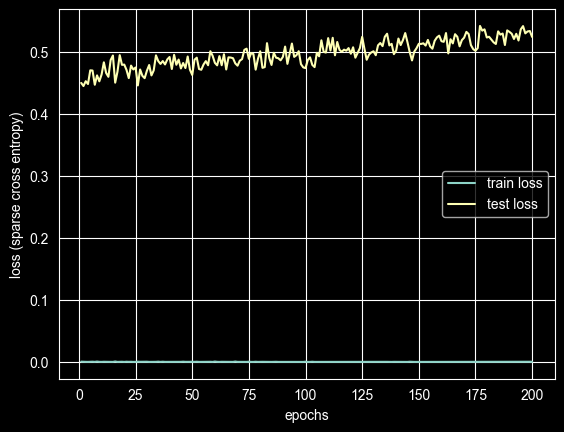

In [84]:
epochs = 200
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_test, y_test), verbose=False)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_axis = range(1, len(loss)+1)
plt.plot(epochs_axis, loss, label='train loss')
plt.plot(epochs_axis, val_loss, label='test loss')
plt.xlabel('epochs')
plt.ylabel('loss (sparse cross entropy)')
plt.legend()